In [2]:
from bs4 import BeautifulSoup
import csv
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt

In [3]:
a_url = 'https://ohou.se/productions/125056/selling?affect_type=StoreSearchResult&affect_id=2'
b_url = 'https://ohou.se/productions/75702/selling?affect_type=StoreSearchResult&affect_id=1'
c_url = 'https://ohou.se/productions/410831/selling?affect_type=StoreSearchResult&affect_id=6'

In [4]:
response = requests.get(a_url)
soup = BeautifulSoup(response.text, "html.parser")

count = soup.find('span', {'class':'production-selling-navigation__item__count'})

# Ï¥ù Î¶¨Î∑∞ Ïàò Î¨∏ÏûêÏó¥Î°ú Î∞õÏïÑÏò® Îã§Ïùå , Ï†úÍ±∞ÌïòÍ≥† Ï†ÄÏû•
total = int(count.text.replace(',', ''))
list_len = 5
pages = total // list_len

if (total % 5 > 0):
    pages += 1

In [5]:
a_rq_url = 'https://ohou.se/production_reviews.json?production_id=125056&page=1&order=best&photo_review_only='
response = requests.get(a_rq_url)
rsp_j = json.loads(response.text)
# rsp_j
rsp_j['reviews'][1]['review']['comment']

'ÏùºÎ∂ÄÎü¨ ÏõêÎ™©ÏÑ†Î∞òÏùÑ Ïò¨Î†§ÎëêÍ≥†Ïã∂Ïñ¥ÏÑú Ï†ÄÎäî Ïπ®ÎåÄÎäî ÌÄ∏ÏÇ¨Ïù¥Ï¶àÏóê ÍπîÌåêÏùÄ Ïã±Í∏ÄÎ°úÎëêÍ∞úÏãúÏºúÏÑú Î∂ôÏó¨ÏÑúÍπîÏïòÏñ¥Ïöî ÎçïÎ∂ÑÏóêÎî± ÏõêÌïòÎäî Í∑∏Î¶ºÏù¥ ÎÇòÏôîÎÑ§Ïöî Ï†ÄÏ≤òÎüºÌïòÍ≥†Ïã∂ÏùÄ Î∂ÑÎì§ÏùÄ ÍπîÌåêÏÇ¨Ïù¥Ï¶à ÌÅ∞Í±∞ÏãúÌÇ§ÎäîÍ±∞Î≥¥Îã§ Ïã±Í∏ÄÎëêÍ∞úÏãúÌÇ§ÎäîÍ≤å ÎçîÏã∏Ïöî^^'

In [6]:
a_reviews = []
index = 0

for i in range(pages):
    a_rq_url = 'https://ohou.se/production_reviews.json?production_id=125056&page=%d&order=best&photo_review_only=' % i
    response = requests.get(a_rq_url)
    j = json.loads(response.text)
    
    for i in range(list_len):
        if (index < total):
            a_reviews.append(j['reviews'][i]['review']['comment'])
            index += 1
        else:
            break

len(a_reviews)

4869

In [17]:
from konlpy.tag import Mecab
tagger = Mecab(dicpath="C:\\mecab\\mecab-ko-dic")

stop_words = "ÏùÄ Ïù¥ Í≤É Îì± Îçî Î•º Ï¢Ä Ï¶â Ïù∏ Ïòπ Îïå Îßå Ïõê Ïù¥Îïå Í∞ú Ïùº Í∏∞ Ïãú Îü≠ Í∞§ ÏÑ± ÏÇº Ïä§ Ìè∞ Ìä∏ Îìú Í∏∞ Ïù¥ Î¶¨ Ìè¥ ÏÇ¨ Ï†Ñ Îßà Ïûê Ìîå Î∏î Í∞Ä"
stop_words=stop_words.split(' ')
stop_words[0:10]

# Î∂àÏö©Ïñ¥ Ï†úÍ±∞
nouns = []
for review in a_reviews:
    for noun in tagger.nouns(review):
        if noun not in stop_words:
            nouns.append(noun)

# Ï∂úÌòÑÎπàÎèÑÍ∞Ä ÎÜíÏùÄ ÏÉÅÏúÑ 20Í∞ú Îã®Ïñ¥ Ï∂îÏ∂ú
# Ï∂îÏ∂úÎêú ÏÉÅÏúÑ 20Í∞úÏùò Îã®Ïñ¥ ÎπàÎèÑÎäî dict Ìï®ÏàòÎ•º ÌÜµÌï¥ ÎîïÏÖîÎÑàÎ¶¨ ÌòïÌÉúÎ°ú Ï†ÄÏû•
from collections import Counter
num_top_nouns = 20
nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(num_top_nouns))
top_nouns

{'Îß§Ìä∏Î¶¨Ïä§': 1604,
 'Î∞∞ÏÜ°': 1548,
 'ÏÇ¨Ïù¥Ï¶à': 1425,
 'Í±∞': 1040,
 'ÎÇòÎ¨¥': 717,
 'ÎßåÏ°±': 661,
 'Ïπ®ÎåÄ': 644,
 'ÏÉùÍ∞Å': 626,
 'Íµ¨Îß§': 619,
 'ÏÇ¨Ïö©': 608,
 'ÍπîÌåê': 545,
 'ÌÄ∏': 540,
 'ÏäàÌçº': 525,
 'ÎÉÑÏÉà': 495,
 'Í∞ÄÍ≤©': 425,
 'Í≤å': 417,
 'Î∂ÄÎ∂Ñ': 391,
 'Ï£ºÎ¨∏': 360,
 'Ïã±Í∏Ä': 317,
 'ÏõêÎ™©': 299}

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49569 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44144 missing from current

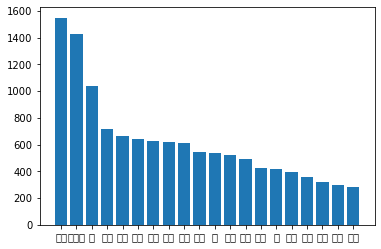

In [12]:
plt.bar(top_nouns.keys(), top_nouns.values())
plt.show()

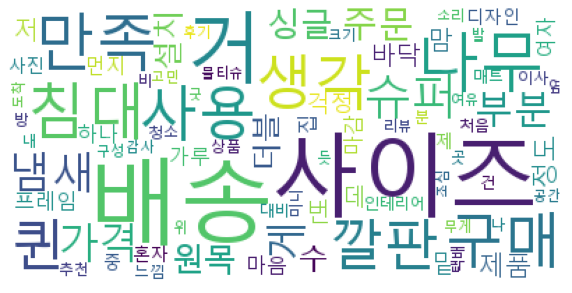

In [13]:
from wordcloud import WordCloud

top_nouns = dict(nouns_counter.most_common(80))

wc = WordCloud(background_color="white", font_path='./font/malgun.ttf')
wc.generate_from_frequencies(top_nouns)

import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(wc)

In [14]:
words = []
for review in a_reviews:
    words.extend(tagger.pos(review))
words[0:10]

[('Ïù¥Îü∞', 'MM'),
 ('Í±∞', 'NNB'),
 ('Ìåî', 'VV'),
 ('ÏßÄ', 'EC'),
 ('ÎßàÏÑ∏Ïöî', 'VX+EP+EF'),
 (':', 'SC'),
 (':', 'SC'),
 ('Ìùê', 'IC'),
 ('Í∏∞', 'ETN'),
 ('Ï¢ã', 'VA')]

In [15]:
'''
ÎßêÎ≠âÏπò ÌååÏùº Îã®Ïñ¥ ÎπàÎèÑ Î∂ÑÏÑù
- ÏûêÎ£åÌòï Íµ¨Ï°∞Ïóê ÎåÄÌïú Ïù¥Ìï¥
- list, tuple, dict ÏÇ¨Ïö©ÌïòÍ∏∞
'''
word_dic = {}

for word in words:
    if word[1] == "NNG": #  ÏùºÎ∞òÎ™ÖÏÇ¨ ÌôïÏù∏ÌïòÍ∏∞ --- (‚Äª3)
        if not (word[0] in word_dic):
            word_dic[word[0]] = 0
        word_dic[word[0]] += 1 # Ïπ¥Ïö¥Ìä∏ÌïòÍ∏∞


print(word_dic)

{'ÌõÑÍ∏∞': 97, 'ÎåìÍ∏Ä': 6, 'Î∞îÎã•': 242, 'ÎÇòÏÇ¨': 31, 'Ìã±': 2, 'ÏñëÏã¨': 2, 'ÏßÅÏû•': 2, 'Ïó¨Ïûê': 169, 'ÍµêÌôò': 51, 'ÎπÑÏßÄÎñ°': 6, 'Îßê': 39, 'ÏõêÎ™©': 299, 'ÏÑ†Î∞ò': 8, 'Ïπ®ÎåÄ': 644, 'ÏÇ¨Ïù¥Ï¶à': 1143, 'ÍπîÌåê': 545, 'Ïã±Í∏Ä': 309, 'ÎçïÎ∂Ñ': 21, 'Ïõê': 95, 'Í∑∏Î¶º': 7, 'ÏÉùÍ∞Å': 626, 'Îïå': 356, 'ÎÜíÏù¥': 30, 'Ï†Ñ': 116, 'ÎÇòÎ¨¥': 717, 'Í∞ÄÎ£®': 188, 'Î®ºÏßÄ': 170, 'Îàà': 17, 'Ï≤®': 20, 'ÏãúÍ∞Ñ': 32, 'ÌîÑÎ†àÏûÑ': 190, 'Î≤åÎ†à': 21, 'Í∞úÎØ∏': 8, 'Ï¥àÎ°ùÎπõ': 2, 'ÏÉàÎ≤Ω': 5, 'Îèà': 19, 'ÎèôÏπ®': 2, 'Ï∂îÏ≤ú': 129, 'ÎçîÎ∏î': 254, 'Íµ¨Îß§': 619, 'Îß§Ìä∏Î¶¨Ïä§': 1604, 'ÏäàÌçº': 525, 'ÎßåÏ°±': 661, 'Ïù∏ÌÖåÎ¶¨Ïñ¥': 145, 'Ïã†Î∂Ñ': 3, 'Ï∞∏Í≥†': 52, 'ÌÇπÏÇ¨Ïù¥Ï¶à': 63, 'Ï†ïÎèÑ': 243, 'Í∞ïÏïÑÏßÄ': 23, 'Í≥∞Ìå°Ïù¥': 63, 'ÏúÑÌóò': 17, 'ÏöîÏÜå': 3, 'Ïò§Îäò': 18, 'Ïßë': 171, 'Î†àÌä∏': 3, 'Î™®Ïñë': 19, 'Ï†úÌíà': 249, 'Ìèâ': 11, 'Ïà≤': 12, 'ÏÑ†ÌÉù': 37, 'Ï£ºÎ¨∏': 360, 'ÏïàÏ†ï': 36, 'Í≥†Î¨¥': 30, 'Ìå®ÌÇπ': 9, 'Î∞∞ÏÜ°': 1548, 'Ïù¥ÌãÄ': 45, 'ÏÜåÏöî': 2, 'ÏÑ†Í≤∞': 5, 'ÏòÜ': 105, 'Í≥≥': 109, 'ÌÉùÎ∞∞'

In [16]:
# Í∞íÏùò ÏàòÏπòÍ∞Ä Í∞ÄÏû• ÌÅ∞ Í≤É Î∂ÄÌÑ∞ Ïó≠ÏàúÏúºÎ°ú Ï†ïÎ†¨ÌïòÏó¨ Î≥¥Ïó¨ Ï§ÄÎã§.
keys = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
print(keys[0:20])

[('Îß§Ìä∏Î¶¨Ïä§', 1604), ('Î∞∞ÏÜ°', 1548), ('ÏÇ¨Ïù¥Ï¶à', 1143), ('ÎÇòÎ¨¥', 717), ('ÎßåÏ°±', 661), ('Ïπ®ÎåÄ', 644), ('ÏÉùÍ∞Å', 626), ('Íµ¨Îß§', 619), ('ÏÇ¨Ïö©', 608), ('ÍπîÌåê', 545), ('ÏäàÌçº', 525), ('ÎÉÑÏÉà', 495), ('Í∞ÄÍ≤©', 425), ('Î∂ÄÎ∂Ñ', 391), ('Ï£ºÎ¨∏', 360), ('Îïå', 356), ('Ïã±Í∏Ä', 309), ('ÏõêÎ™©', 299), ('ÏÑ§Ïπò', 283), ('ÎçîÎ∏î', 254)]


## BoW Í∏∞Î∞ò Î∂ÑÏÑùÌï¥Î≥¥Í∏∞

### 1. Îã®Ïñ¥ Íæ∏Îü¨ÎØ∏ ÎßåÎì§Í∏∞

In [36]:
bows = ['ÏµúÍ≥†', 'ÎßåÏ°±', 'Ï¢ãÏïÑÏöî', 'Í∞êÏÇ¨', 'Î≥ÑÎ°ú', 'ÏµúÏïÖ', 'Í∞ÄÏÑ±ÎπÑ', 'ÎåÄÎ∞ï', 'ÎπÑÏßÄÎñ°', 'ÌóàÏ†ë']
text1 = ' '.join(a_reviews[0:100])
text2 = ' '.join(a_reviews[100:200])
print(text1)
print(text2)

Ïù¥Îü∞Í±∞ ÌåîÏßÄÎßàÏÑ∏Ïöî:: ÌùêÍ∏∞ Ï¢ãÏïÑÏÑú ÏÉÄÎäîÎç∞ ÌõÑÍ∏∞ ÏïåÎ∞îÏù∏Í∞ÄÏöî?ÎåìÍ∏Ä Îã§Îì§ Î≥¥ÏãúÎùºÍ≥† Î≥Ñ Îã§ Ï§¨ÏäµÎãàÎã§.. Î∞îÎã•Ïóê ÍπåÎ†§ÎäîÎç∞ ÎÇòÏÇ¨ ÌïòÎÇò Ìã± Îñ®Ïñ¥ÏßÄÍ≥† Î∞îÎã•Ïóê ÎÜìÏïÑÎèÑ ÌùîÎì§Î†§Ïöò.....; ÏñëÏã¨ ÌåîÏßÄÎßàÏÑ∏Ïöî........ ÏßÅÏû•Ïù∏ Ïó¨ÏûêÎùº ÍµêÌôò ÌûòÎì§Í∏∞ÎèÑ ÌïòÍ≥† Î≤àÍ±∞Î°úÏõåÏÑú Í∑∏ÎÉ• ÏîÅÎãàÎã§„Öã ÏãºÍ≤å ÎπÑÏßÄÎñ°Ïù¥ÎùºÎäî Îßê Îî± ÏûòÏñ¥Ïö∏Î†§Ïöî ÏùºÎ∂ÄÎü¨ ÏõêÎ™©ÏÑ†Î∞òÏùÑ Ïò¨Î†§ÎëêÍ≥†Ïã∂Ïñ¥ÏÑú Ï†ÄÎäî Ïπ®ÎåÄÎäî ÌÄ∏ÏÇ¨Ïù¥Ï¶àÏóê ÍπîÌåêÏùÄ Ïã±Í∏ÄÎ°úÎëêÍ∞úÏãúÏºúÏÑú Î∂ôÏó¨ÏÑúÍπîÏïòÏñ¥Ïöî ÎçïÎ∂ÑÏóêÎî± ÏõêÌïòÎäî Í∑∏Î¶ºÏù¥ ÎÇòÏôîÎÑ§Ïöî Ï†ÄÏ≤òÎüºÌïòÍ≥†Ïã∂ÏùÄ Î∂ÑÎì§ÏùÄ ÍπîÌåêÏÇ¨Ïù¥Ï¶à ÌÅ∞Í±∞ÏãúÌÇ§ÎäîÍ±∞Î≥¥Îã§ Ïã±Í∏ÄÎëêÍ∞úÏãúÌÇ§ÎäîÍ≤å ÎçîÏã∏Ïöî^^ ÏÉùÍ∞ÅÎ≥¥Îã§ Î¨¥Í≤ÅÍ≥† Îã§Î•∏ Î¶¨Î∑∞Î¥§ÏùÑÎïå Íπ®ÏßÑÎç∞ ÏûàÎã§Í≥†Ìï¥ÏÑú ÏÇ¥Ìé¥Î¥§ÎäîÎç∞ Îã§ÌñâÌûà Íπ®ÏßÑÎç∞ ÏóÜÏù¥ ÏôîÏñ¥Ïöî ÍπîÌåê ÎÜíÏù¥Í∞Ä ÏÇ¥Ïßù Îçî ÎÜíÏïòÏúºÎ©¥ Îçî Ï¢ãÏïòÏùÑÍ±∞ Í∞ôÏïÑÏöî 
Í∑∏Î¶¨Í≥† Ïπ®ÎåÄ Ïò¨Î¶¨Í∏∞ Ï†ÑÏóê Íº≠ Îã¶Í≥† Ïò¨Î¶¨ÏÑ∏Ïöî
ÎÇòÎ¨¥Í∞ÄÎ£®?Îûë Î®ºÏßÄÍ∞Ä ÎààÏóê ÏïàÎ≥¥Ïù¥ÎäîÎç∞ ÎßéÏïÑÏöî Ïûò Î≥¥Ïù

### 2. indexing ÌïòÍ∏∞

In [37]:
# Îã®Ïñ¥-Ïù∏Îç±Ïä§ ÎîïÏÖîÎÑàÎ¶¨
word_to_index = {}

# ÌÜ†ÌÅ∞ÏùÑ Ïù∏Îç±Ïä§Î°ú Î≥ÄÌôò
for bow in bows:
    if token not in word_to_index.keys():
        word_to_index[bow] = len(word_to_index)
        
print(word_to_index)

{'ÏµúÍ≥†': 0, 'ÎßåÏ°±': 1, 'Ï¢ãÏïÑÏöî': 2, 'Í∞êÏÇ¨': 3, 'Î≥ÑÎ°ú': 4, 'ÏµúÏïÖ': 5, 'Í∞ÄÏÑ±ÎπÑ': 6, 'ÎåÄÎ∞ï': 7, 'ÎπÑÏßÄÎñ°': 8, 'ÌóàÏ†ë': 9}


### 3. BoW Í∏∞Î∞ò Ïπ¥Ïö¥Ìä∏ Í≥ÑÏÇ∞ÌïòÍ∏∞

In [38]:
# BoWÎ°ú Î≥ÄÌôò
def convert_bow(sentence, word_to_index):
    
    # Î≤°ÌÑ∞Î•º Îã®Ïñ¥Ïùò Í∞úÏàòÎßåÌÅº 0ÏúºÎ°ú Ï¥àÍ∏∞Ìôî
    vector = [0]*(len(word_to_index))

    # Î¨∏Ïû•ÏùÑ ÌÜ†ÌÅ∞ÏúºÎ°ú Î∂ÑÎ¶¨
    tokenizer = Okt()
    tokens = tokenizer.morphs(sentence)
    
    # Îã®Ïñ¥Ïùò Ïù∏Îç±Ïä§ ÏúÑÏπòÏóê 1 ÏÑ§Ï†ï
    for token in tokens:
        if token in word_to_index.keys():
            vector[word_to_index[token]] += 1
    
    return vector

print(convert_bow(text1, word_to_index))
print(convert_bow(text2, word_to_index))

[0, 1, 19, 0, 2, 0, 0, 0, 0, 0]
[0, 3, 17, 0, 2, 0, 0, 0, 0, 0]


### 4. cosÏú†ÏÇ¨ÎèÑÎ°ú Î¨∏Ïû•/Î¨∏ÏÑúÍ∞Ñ Ïú†ÏÇ¨ÎèÑ ÎπÑÍµêÌï¥Î≥¥Í∏∞

### 5. Î¨∏Ï†úÏ†ê ÌôïÏù∏ÌïòÍ∏∞

1. Ï†ïÏùòÌïú ÏÇ¨Ï†ÑÏóê ÏóÜÎäî Îã®Ïñ¥Îäî Ïûò Ïπ¥Ïö¥Ìä∏ ÎêòÏßÄ ÏïäÎäîÎã§
2. Ï†ïÌôïÎèÑÍ∞Ä ÎÇÆÎã§